### D'après X-PSI 2014

Ce sujet traite des tournois à élimination directe tels qu'on en rencontre en sport. La première partie concerne leurs représentations. La deuxième partie consiste à exhiber les vainqueurs possibles d'un tournoi si l'on connaît à l'avance les résultats de tous les matchs possibles. Enfin la troisième partie calcule les chances de victoire de chaque joueur en fonction de pronostics donnés pour chaque match possible.

La complexité, ou le temps d'exécution, d'un programme $P$ (fonction ou procédure) est le nombre d'opérations élémentaires (addition, multiplication, affectation, test, etc...) lors de l'exécution de $P$. Lorsque cette complexité dépend d'un paramètre $n$, on dira que $P$ a une complexité en $O(f(n))$, s'il existe $K>0$ tel que la complexité de $P$ est au plus $K f(n)$, pour tout $n$.

De manière générale, on s'attachera à garantir une complexité aussi petite que possible dans les fonctions écrites notamment lorsque la complexité d'une fonction est demandée. Dans ce cas, il faudra justifier cette dernière si elle ne se déduit pas directement de la lecture du code.

Dans tout le sujet, on considère que le nombre de joueurs est fixé à $n$, qui est une variable globale à laquelle tous les programmes peuvent accéder, sans avoir à la définir ni à la passer en argument des fonctions. On suppose aussi que les tableaux sont indexés à partir de 1. On appelle vecteurs les tableaux à une dimension, et matrices ceux à deux dimensions.


# Partie I. Tournois

Dans cette partie, on s'intéresse à la représentation et à la manipulation de tournois à élimination directe entre $n$ joueurs. Les joueurs sont représentés par les entiers de 0 à $n-1$. Un tournoi entre ces $n$ joueurs est défini par une suite de $n-1$ matchs. Chaque match oppose deux joueurs, qui sont désignés soit nommément (dans la figure 1, le match "A" oppose le joueur 4 au joueur 1 ; le match "B" oppose le joueur 2 au joueur 0), soit en fonction du résultat d'un match antérieur (dans la figure 1, le match "C" oppose le vainqueur du match "B" au joueur 3 ; le match "D" oppose le vainqueur du match "A" au vainqueur du match "C"; le match "E" oppose le vainqueur du match "D" au joueur 5).

![Tournoi1.png](attachment:Tournoi1.png )

Afin de représenter un tournoi en machine, on va identifier les matchs avec les entiers $n$, $n+1, \ldots, 2 n-2$ plutôt qu'avec des lettres comme dans l'exemple précédent. Ainsi dans l'exemple ci-dessus le match précédemment appelé "A" sera le match 6, le match "B" sera le match 7, le match "C" sera le match 8, le match "D" sera le match 9 et le match "E" sera le match 10. Pour représenter un match on va utiliser un tableau de taille deux (liste de listes à 2 éléments) dont les éléments sont les protagonistes (joueurs ou match) du match : s'il s'agit d'un joueur on donnera son indice et s'il s'agit du vainqueur d'un match précédent on donnera l'indice du match. Pour avoir unicité de la représentation d'un match, on adoptera systématiquement la convention qu'un match $[i, j]$ est tel que $i \leqslant j$. Ainsi le match 6 (précédemment appelé "A") et le match 9 (précédemment appelé "D") sont représentés par les sous-listes $[1,4]$ et $[6,8]$.

Par la suite, on identifiera pour tout entier $0 \leqslant i \leqslant n-1$, le joueur $i$ et le match $[i, i]$. Cela permet alors de représenter un tournoi par un tableau de $2 n-1$ matchs de la façon suivante. Les $n$ premiers matchs sont les matchs $[0,0], \ldots,[n-1, n-1]$, les $(n-1)$ matchs suivants étant les matchs réels. Par exemple, le tournoi précédent pourra être représenté par le tableau suivant :

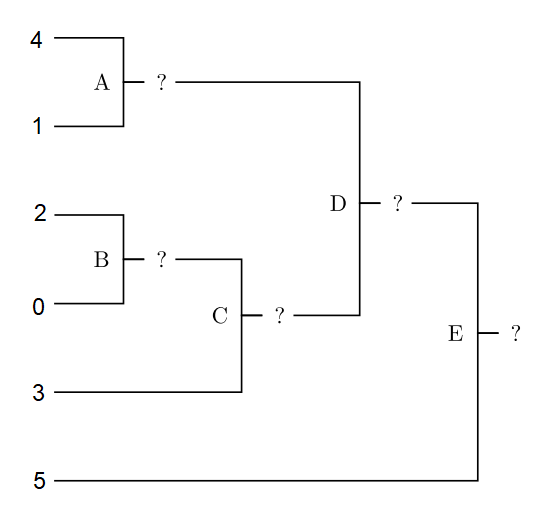

In [3]:
n=6
T=[[0,0],[1,1],[2,2],[3,3],[4,4],[5,5],[1,4],[0,2],[3,7],[6,8],[5,9]]


Bien sûr, toute matrice d'entiers $T$, de taille $(2 n-1) \times 2$ ne code pas un tournoi. En fait, un tournoi est codé par une matrice d'entiers $T$ de taille $(2 n-1) \times 2$ si et seulement si :

(1) pour tout $0 \leqslant k \leqslant 2 n-2, T[k][0] \leqslant T[k][1]$;

(2) pour tout $0 \leqslant k \leqslant n-1, T[k][0]=T[k][1]=k$;

(3) pour tout $n \leqslant k \leqslant 2 n-2, T[k][0] \neq T[k][1]$;

(4) pour tout $n \leqslant k \leqslant 2 n-2,0 \leqslant T[k][0]<k$ et $0 \leqslant T[k][1]<k$;

(5) pour tout $0 \leqslant k \leqslant 2 n-3$, il existe un unique $k^{\prime}>k$ tel que $k \in\left\{T\left[k^{\prime}\right][0], T\left[k^{\prime}\right][1]\right\}$ 

!!! question Question 1
Donner une interprétation en français des conditions (3), (4) et (5) exprimées ci-dessus pour qu'une matrice $T$ soit un tournoi. Par exemple la condition (2) s'interprète comme "les $n$ premiers éléments de la représentation d'un tournoi sont les matchs triviaux identifiés aux joueurs". La condition (1) correspond à la convention que le premier protagoniste d'un match est, celui de plus petit indice.
!!!

!!! success Solution
 La condition (3) s'interprète comme "les $n-1$ derniers éléments de la
représentation d'un tournoi sont des matchs réels entre deux joueurs (ou vainqueurs)
différents".

La condition (4) s'interprète comme "les $n-1$ derniers éléments de la représentation
d'un tournoi sont des matchs non triviaux entre deux joueurs ou vainqueurs de matchs
précédents. Les joueurs du match ne peuvent être les vainqueurs d'un match qui n'a
pas encore eu lieu.".

La condition (5) s'interprète comme "les $n$ joueurs et les vainqueurs des $n−2$ premiers
matchs réels participent à un match et ne peuvent participer à un autre match que s'ils
sont vainqueurs.".
!!!

!!! question Question 2
Écrire une fonction ```EstVraiCondition5(T, k)``` qui prend en argument une matrice d'entiers de taille $(2 n-1) \times 2$ et un entier $k$ tel que $0 \leqslant k \leqslant 2 n-3$ et qui renvoie \texttt{True} s'il existe un unique $k^{\prime}>k$ tel que $k \in\left\{T\left[k^{\prime}\right][0], T\left[k^{\prime}\right][1]\right\}$ et \texttt{False} sinon. Quelle est sa complexité ? On supposera, sans avoir à le vérifier, que le matrice $T$ est de taille $(2 n-1) \times 2$.
!!!

In [4]:
def EstVraiCondition5(T,k):
    compteur=0
    for i in range(k+1,2*n-1):
        if T[i][0]==k or T[i][1]==k:
            compteur+=1
    return compteur==1

EstVraiCondition5(T,7)

True

!!! question Question 3
Écrire une fonction ```EstUnTournoi(T)``` qui prend en argument une matrice d'entiers et qui renvoie `True` si $T$ est un tournoi, et `False` sinon. Quelle est sa complexité ? On supposera, sans avoir à le vérifier, que le matrice $T$ est de taille $(2 n-1) \times 2$.
!!!

In [5]:
def EstUnTournoi (T) :
    for k in range (n): #cond 2
        if T[k][0]!=k or T[k][1] !=k:
            return False
    for k in range(n+1,2*n-1): #cond 1 et 3
        if T[k][0]>=T[k][1]:
            return False
    for k in range(n+1,2*n-1): #cond 4
        if T[k][1]>=k:
            return False
    for k in range(1,2*n-2): #cond 5
        if not(EstVraiCondition5(T,k)):
            return False
    return True

EstUnTournoi(T)

True

On s'intéresse maintenant à la manière dont se déroule le tournoi, à l'aide de matrices, appelées _oracles_, qui prédisent le résultat de chaque match possible. Un oracle $O$ est une matrice de booléens, de taille $n \times n$ qui représente les résultats de tous les matchs possibles : $O[i][j]$ contient ``True`` si $i$ remporte les matchs joués entre $i$ et $j$, et ``False`` sinon (il s'ensuit que, pour tous $i$ et $j$ distincts, $O[i][j]$ contient ``True`` si et seulement si $O[j][i]$ contient ``False``). Par convention, on supposera que les cases de la diagonale contiennent ``True``.

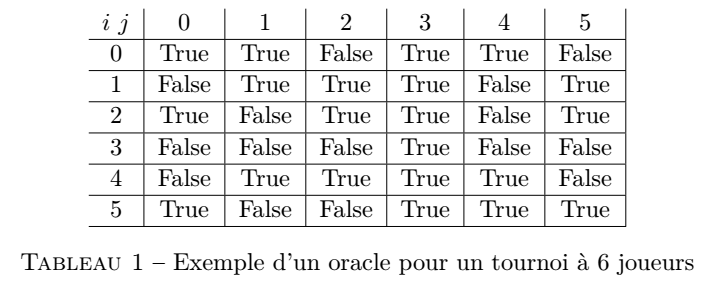


In [6]:
O=[[True , True , False , True , True , False ],
[ False , True , True , True , False , True ],
[ True , False , True , True , False , True ],
[False , False , False , True , False , False],
[False , True , True , True , True , False ],
[True , False , False , True , True , True ]]

!!! question Question 4
Écrire une fonction ``EstUnOracle(O)`` qui prend en argument une matrice de booléens et qui renvoie ``True`` si $O$ est un oracle, et ``False`` sinon. Quelle est sa complexité ? On supposera que la matrice $O$ est de taille $n \times n$.
!!!

In [7]:
def EstUnOracle(O):
    for i in range(n):
        if O[i][i]==False:
            return False
        for j in range(i+1,n):
            if O[i][j]==O[j][i]:
                return False
    return True

EstUnOracle(O)

True

La donnée d'un tournoi et d'un oracle détermine la manière dont se déroule le tournoi. Dans notre exemple, on obtient le résultat décrit dans la figure 3.
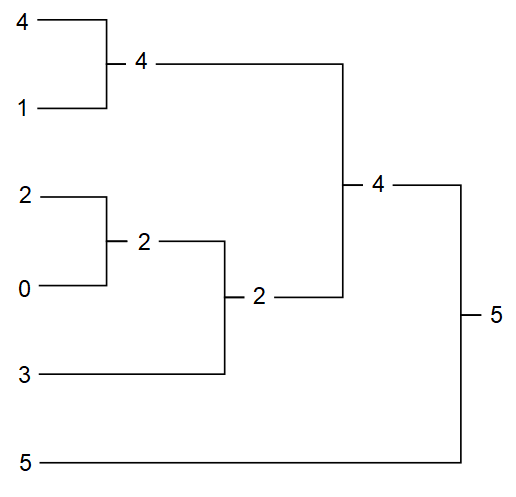

!!! question Question 5
Écrire une fonction ``Vainqueur(T, O)`` qui prend en argument un tournoi et un oracle, et qui renvoie le vainqueur du tournoi $T$ selon l'oracle $O$. Il est judicieux d'écrire une fonction auxiliaire récursive (``VainqueurMatch(k)``) qui sera appelée dans la fonction ``Vainqueur``
!!!

In [9]:
def Vainqueur(T,O):
    def VainqueurMatch(k):
        if k<n:
            return k
        else:
            joueur1=VainqueurMatch(T[k][0])
            joueur2=VainqueurMatch(T[k][1])
            if O[joueur1][joueur2]:
                return joueur1
            else:
                return joueur2
    return VainqueurMatch(2*n-2)

Vainqueur(T,O)

5

# Partie II. Vainqueurs Potentiels

Nous avons vu dans la Partie I qu'un tournoi $T$ et un oracle $O$ définissaient un vainqueur. Étant donné un oracle $O$, le vainqueur d'un tournoi peut varier en fonction du tournoi $T$ considéré. Nous cherchons dans cette partie à identifier tous les vainqueurs possibles lorsque $T$ varie, mais que $O$ est fixe. On appellera ces vainqueurs les vainqueurs potentiels de $O$.

!!! question Question 6
Donner un oracle qui n'a qu'un seul vainqueur potentiel. Donner un oracle qui a plusieurs vainqueurs potentiels.
!!!

!!! success Solution
Si on considère un oracle tel que, par exemple, le premier joueur gagne tous
ses matchs contre les autres adversaires alors le premier joueur est le seul vainqueur
possible.

Si on considère un oracle tel que le premier joueur gagne tous ses matchs sauf contre
le deuxième joueur et tel que le deuxième joueur perd tous ses matchs sauf contre le
premier alors :

- le premier joueur ne sera pas le vainqueur s'il rencontre le deuxième joueur lors
de son premier match

- le premier joueur sera le vainqueur si le deuxième joueur rencontre tout autre
joueur que le premier lors de son premier match
!!!

Pour calculer efficacement tous les vainqueurs potentiels de $O$ nous allons partir d'un premier vainqueur, pour en déduire d'autres, jusqu'à ce qu'on les ait tous trouvés.

!!! question Question 7 
Écrire une fonction ``UnVainqueur(O)`` qui prend en argument un oracle $O$ et qui renvoie un vainqueur potentiel de $O$. Quelle est sa complexité ? On supposera que $O$ est un oracle.
!!!


In [10]:
def UnVainqueur(O):
    Vainqueur=0
    for k in range(1,n):
        if O[k][Vainqueur]:
            Vainqueur=k
    return Vainqueur

UnVainqueur(O)

5

Dans le sujet d'origine, on demandait de montrer que si $i$ est un vainqueur potentiel de $O$, et que $O$ prédit que $j$ remporte le match entre $i$ et $j$, alors $j$ est un vainqueur potentiel de $O$. De plus on demandait de montrer que, si un ensemble $X$ non-vide de joueurs est tel que $O$ prédit que chaque joueur de $X$ gagne tous ses matchs contre les joueurs hors de $X$, alors tous les vainqueurs potentiels de $O$ sont dans $X$.

!!! question Question 8
En utilisant les remarques précédentes, écrire la fonction ``vainqueursPotentiels(O)`` qui prend en argument un oracle $O$ et qui renvoie un vecteur $v$ de taille $n$ tel que ``v[i]=True`` si $i$ est un vainqueur potentiel de $O$, et ``v[i]=False`` sinon. On utilisera une pile (liste) permettant de stocker les gagnants potentiels (la fonction demandée ressemble aux fonctions de parcours de graphe).
!!!

In [11]:
def vainqueursPotentiel(O):
    v=[False]*(n)
    pile=[UnVainqueur(O)]
    while pile!=[]:
        x=pile.pop()
        if not(v[x]):
            v[x]=True
            for k in range(0,n):
                if not(v[k]) and O[k][x]:
                    pile.append(k)
    return v

vainqueursPotentiel(O)

[True, True, True, False, True, True]

# Partie III. Pronostics

Dans cette partie, les oracles sont remplacés par des pronostics, qui donnent des chances (ou probabilités) de victoire plutôt que des certitudes. L'objectif de cette partie est de calculer la probabilité qu'a chaque joueur de remporter le tournoi.

La première difficulté réside dans le fait que l'issue d'un match ne peut plus être déterminée avec certitude, et que donc plusieurs joueurs peuvent potentiellement participer à un même match. Il faut donc pouvoir calculer, pour chaque match, l'ensemble des joueurs susceptibles d'y participer.

In [12]:
P=[[1 , 0.7 , 0.4 , 0.3 , 0.8 , 0.2 ],
[ 0.3 , 1 , 0.5 , 0.3 , 0.6 , 0.3 ],
[ 0.6 , 0.5 , 1 , 0.4 , 0.4 , 0.4 ],
[0.7 , 0.7 , 0.6 , 1 , 0.7 , 0.3],
[0.2 , 0.4 , 0.6 , 0.3 , 1 , 0.4 ],
[0.8 , 0.7 , 0.6 , 0.7 , 0.6 , 1 ]]

V=[1]*n

!!! question Question 9 
Ecrire une fonction récursive ``VainqueursPossibles(T,k,L)`` qui prend en argument un tournoi $T$, un entier $k$ tel que $0 \leqslant k \leqslant 2 n-2$ et un vecteur de booléens $L$ de taille $n$ tel que ``L[i]=True`` si le joueur $i$ peut être le premier joueur du match d'indice $k$ du tournoi $T$, et ``L[i]=False`` sinon. Cette fonction  modifie le tableau de booléens $L$ représentant les joueurs susceptibles de participer au match $k$. Si $0 \leqslant k \leqslant n-1$, seul le joueur $k$ convient. Si $k > n-1$, on recherche les premier et deuxième joueurs possibles avec des appels récursifs.
!!!

In [13]:
def VainqueursPossibles(T,k,L):
    if k<n:
        L[k]=True
    else:
        match1=T[k][0]
        match2=T[k][1]
        VainqueursPossibles(T,match1,L)
        VainqueursPossibles(T,match2,L)


!!! question Question 10
Écrire une fonction ``PremierJoueurPossible(T, k)`` qui prend en argument un tournoi $T$ et un entier $k$ tel que $0 \leqslant k \leqslant 2 n-2$, et qui renvoie un vecteur de booléens $L$ de taille $n$ tel que ``L[i]=True`` si le joueur $i$ peut être le premier joueur du match d'indice $k$ du tournoi $T$, et ``L[i]=False`` sinon. Cette fonction utilisera la fonction récursive définie précédemment.
!!!

In [14]:
def PremierJoueurPossible(T,k):
    L=n*[False]
    if k<n:
        L[k]=True
        return L
    else:
        joueur=T[k][0]
        VainqueursPossibles(T,joueur,L)
        return L

PremierJoueurPossible(T,6)

[False, True, False, False, False, False]

Nous considérons maintenant, que pour chaque match possible, les chances de victoire de chaque joueur sont données par des pronostics. Un pronostic $P$ est une matrice de réels dans $[0,1]$, de taille $n \times n$, et telle que $P[i][j]$ est la probabilité que $i$ remporte un match contre $j$ (par exemple $P[i][j]=0.75$ s'interprète comme "le joueur $i$ a 3 chances sur 4 de battre le joueur $j$ "). Il s'ensuit que $P[i][j]+P[j][i]=1$, pour tout $i$ et $j$.

Le but de la fin de cette partie est de calculer, à tournoi $T$ et pronostic $P$ donnés, les chances de remporter le tournoi pour chaque joueur. L'approche proposée consiste à maintenir un vecteur (de taille $n$) $V$ de probabilités représentant les chances de chaque joueur d'être encore présent à un moment donné du tournoi : avant le match $n$ (le premier vrai match), le vecteur $V$ ne contiendra que des 1 ; après le dernier, il devra contenir les chances de victoire de chaque joueur. Si $V$ est le vecteur de probabilités courantes avant le match $k$, alors le vecteur $V^{\prime}$ de probabilités après le match est défini comme suit :

- Si $i$ est un premier joueur possible $: V^{\prime}[i]=V[i] \times \sum_{j \text { est un second joueur possible }}(V[j] \times P[i][j])$
- Si $i$ est un second joueur possible $: V^{\prime}[i]=V[i] \times \sum_{j \text { est un premier joueur possible }}(V[j] \times P[i][j])$
- Sinon : $V^{\prime}[i]=V[i]$.


!!! question Question 11
En utilisant les fonctions ``PremierJoueurPossible`` et une fonction analogue ``SecondJoueurPossible``, écrire une fonction ``MiseAJour(T, P, k, V)`` qui prend en argument un tournoi $T$, un pronostic $P$, un match $k$ entier compris entre $n$ et $2 n-2$, et un vecteur de probabilités $V$ et qui met à jour le vecteur de probabilités $V$ après le match $k$ du tournoi $T$.
!!!


In [15]:
def SecondJoueurPossible(T,k):
    L=(n)*[False]
    if k<n:
        L[k]=True
        return L
    else:
        joueur=T[k][1]
        VainqueursPossibles(T,joueur,L)
        return L

def MiseAJour(T,P,k,V):
    Vtemp=(n)*[False]
    Premier = PremierJoueurPossible(T,k)
    Second = SecondJoueurPossible(T,k)
    print(Premier,Second)
    for i in range(0,n):
        if Premier[i]:
            S=0
            for j in range(0,n):
                if Second[j]:
                    S+=V[j]*P[i][j]
            Vtemp[i]=V[i]*S
        elif Second[i]:
            S=0
            for j in range(0,n):
                if Premier[j]:
                    S+=V[j]*P[i][j]
            Vtemp[i]=V[i]*S
        else:
            Vtemp[i]=V[i]
    for i in range(0,n):
        V[i]=Vtemp[i]



!!! question Question 12
Écrire une fonction ``ChancesDeVictoire(T, P)`` qui prend en argument un tournoi $T$ et un pronostic $P$ et qui renvoie un vecteur de réels $V$ tel que $V[i]$ est la probabilité que $i$ remporte le tournoi $T$ selon le pronostic $P$. Il suffit de parcourir les matchs et réutiliser le vecteur de probabilité précédent.
!!!

In [16]:
def ChancesDeVictoire(T,P):
    V=[1]*(n)
    for k in range(n,2*n-1):
        MiseAJour(T,P,k,V)
        print(V)
    return V

V=ChancesDeVictoire(T,P)

[False, True, False, False, False, False] [False, False, False, False, True, False]
[1, 0.6, 1, 1, 0.4, 1]
[True, False, False, False, False, False] [False, False, True, False, False, False]
[0.4, 0.6, 0.6, 1, 0.4, 1]
[False, False, False, True, False, False] [True, False, True, False, False, False]
[0.12, 0.6, 0.24, 0.6399999999999999, 0.4, 1]
[False, True, False, False, True, False] [True, False, True, True, False, False]
[0.08879999999999999, 0.20879999999999999, 0.1104, 0.4479999999999999, 0.144, 1]
[False, False, False, False, False, True] [True, True, True, True, True, False]
[0.017759999999999998, 0.06263999999999999, 0.044160000000000005, 0.13439999999999996, 0.0576, 0.6834399999999999]
